# FlexDriver performance model

Run the performance model of FlexDriver to recreate the charts of the paper.

In [1]:
%config InlineBackend.figure_format = 'retina'

from common import *
from fld_model import *

In [2]:
fld_model_df = pd.concat(fld_model(**kwargs) for kwargs in [
    { 'model': '25GbE/PCIe x8', 'linerate': 25, 'pci_lanes': 8, }, 
    { 'model': '50GbE/PCIe x8', 'linerate': 50, 'pci_lanes': 8, }, 
    { 'model': '100GbE/PCIe x16', 'linerate': 100, 'pci_lanes': 16 },
])
fld_model_df.model = pd.Categorical(fld_model_df.model).reorder_categories(
    ['25GbE/PCIe x8', '50GbE/PCIe x8', '100GbE/PCIe x16'])

In [3]:
fld_model_df[fld_model_df['size'] == 1088][[
    'pci_outbound_control_overhead', 'model', 'pci_expected_bandwidth',
    'pci_packet_rate', 'ethernet_linerate']]

,pci_outbound_control_overhead,model,pci_expected_bandwidth,pci_packet_rate,ethernet_linerate
271,88,25GbE/PCIe x8,46.556279,5.348837,24.548736
271,88,50GbE/PCIe x8,46.556279,5.348837,49.097473
271,88,100GbE/PCIe x16,93.891091,10.787120,98.194946


/home/haggai/miniconda3/envs/flc-model/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1994 rows containing missing values.


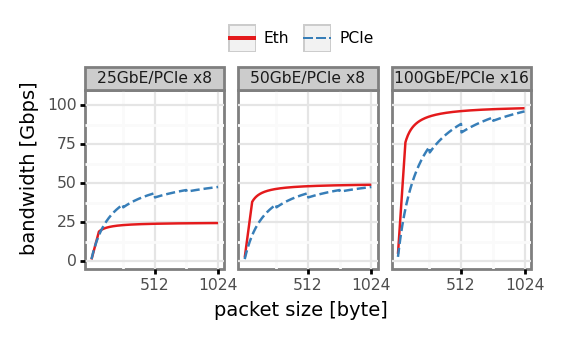

<ggplot: (8755969020145)>

In [4]:
value_vars = ['ethernet_linerate', 'pci_expected_bandwidth']
value_var_names = ['Eth', 'PCIe']
melted = (fld_model_df
          .melt(id_vars=['size', 'model', 'linerate'], value_vars=value_vars)
          .sort_values('linerate')
         )
melted.variable.replace(dict(zip(value_vars, value_var_names)), inplace=True)
melted.variable = melted.variable.astype(pd.CategoricalDtype()).cat.reorder_categories(value_var_names[:min(len(value_vars), len(value_var_names))])
plt = p9.ggplot(melted,
                p9.aes(x='size', y='value', color='variable', linetype='variable')) + \
    p9.geom_line() + \
    p9.scale_x_continuous(name='packet size [byte]', limits=(4, 1024), breaks=[512 * i for i in range(1, 5)]) + \
    p9.scale_y_continuous(name='bandwidth [Gbps]', limits=(0, None)) + \
    top_legend + \
    p9.theme(figure_size=(fig_width-0.5, performance_model_height),
             subplots_adjust={'top': 0.8}) + \
    p9.coord_cartesian(ylim=(0, None)) + \
    p9.facet_wrap('model') + \
    eth_pci_scale
plt

In [5]:
plt.save('fld_model_breakdown.pdf')

/home/haggai/miniconda3/envs/flc-model/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 2.87566 x 1.3 in image.
/home/haggai/miniconda3/envs/flc-model/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: fld_model_breakdown.pdf
/home/haggai/miniconda3/envs/flc-model/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1994 rows containing missing values.


In [6]:
df = fld_model_df[fld_model_df['size'] == 512][['linerate', 'bandwidth', 'ethernet_linerate']].set_index('linerate')

In [7]:
df['bandwidth'] / df['ethernet_linerate']

linerate
25     1.000000
50     0.907016
100    0.914600
dtype: float64